# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


In [ ]:
from google.colab import drive

In [ ]:
drive.mount("MyDrive")
!cp '/content/yolov5/MyDrive/MyDrive/labels.zip' /content/yolov5

Mounted at MyDrive


In [2]:
!unzip "labels.zip"

Archive:  labels.zip
   creating: labels/
   creating: labels/train/
  inflating: labels/train/142.txt    
  inflating: labels/train/143.txt    
  inflating: labels/train/1.txt      
  inflating: labels/train/100.txt    
  inflating: labels/train/101.txt    
  inflating: labels/train/102.txt    
  inflating: labels/train/103.txt    
  inflating: labels/train/105.txt    
  inflating: labels/train/106.txt    
  inflating: labels/train/107.txt    
  inflating: labels/train/108.txt    
  inflating: labels/train/109.txt    
  inflating: labels/train/110.txt    
  inflating: labels/train/111.txt    
  inflating: labels/train/112.txt    
  inflating: labels/train/113.txt    
  inflating: labels/train/114.txt    
  inflating: labels/train/115.txt    
  inflating: labels/train/116.txt    
  inflating: labels/train/117.txt    
  inflating: labels/train/118.txt    
  inflating: labels/train/119.txt    
  inflating: labels/train/12.txt     
  inflating: labels/train/120.txt    
  inflating: labels

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import shutil
%matplotlib inline

In [4]:
os.mkdir("/content/yolov5/datasets")
os.mkdir("/content/yolov5/datasets/images")
os.mkdir("/content/yolov5/datasets/labels")

In [5]:
# saving labels
for file in glob("labels/train/*.txt"):
  shutil.move(file, 'datasets/labels')

for file in glob("labels/test/*.txt"):
  shutil.move(file, 'datasets/labels')

In [6]:
# saving images
for file in glob("labels/train/*"):
  shutil.copy(file, 'datasets/images')

for file in glob("labels/test/*"):
  shutil.copy(file, 'datasets/images')

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

Train a YOLOv5s model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [7]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 64 --epochs 10 --data custom.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-178-g4870064 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=

In [27]:
!zip -r 'exp.zip' runs/train/exp

  adding: runs/train/exp/ (stored 0%)
  adding: runs/train/exp/weights/ (stored 0%)
  adding: runs/train/exp/weights/best.pt (deflated 9%)
  adding: runs/train/exp/weights/last.pt (deflated 9%)
  adding: runs/train/exp/hyp.yaml (deflated 45%)
  adding: runs/train/exp/labels_correlogram.jpg (deflated 35%)
  adding: runs/train/exp/train_batch1.jpg (deflated 3%)
  adding: runs/train/exp/train_batch0.jpg (deflated 2%)
  adding: runs/train/exp/results.png (deflated 10%)
  adding: runs/train/exp/confusion_matrix.png (deflated 39%)
  adding: runs/train/exp/PR_curve.png (deflated 28%)
  adding: runs/train/exp/results.csv (deflated 80%)
  adding: runs/train/exp/labels.jpg (deflated 22%)
  adding: runs/train/exp/val_batch0_labels.jpg (deflated 13%)
  adding: runs/train/exp/train_batch2.jpg (deflated 2%)
  adding: runs/train/exp/F1_curve.png (deflated 17%)
  adding: runs/train/exp/R_curve.png (deflated 20%)
  adding: runs/train/exp/opt.yaml (deflated 42%)
  adding: runs/train/exp/P_curve.png (def

In [ ]:
!cp /content/yolov5/exp.zip /content/yolov5/MyDrive/MyDrive/

### Detection

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source datasets/images/108.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=datasets/images/108.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-178-g4870064 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/datasets/images/108.jpg: 480x640 1 lic plate, Done. (0.016s)
Speed: 0.5ms pre-process, 15.8ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


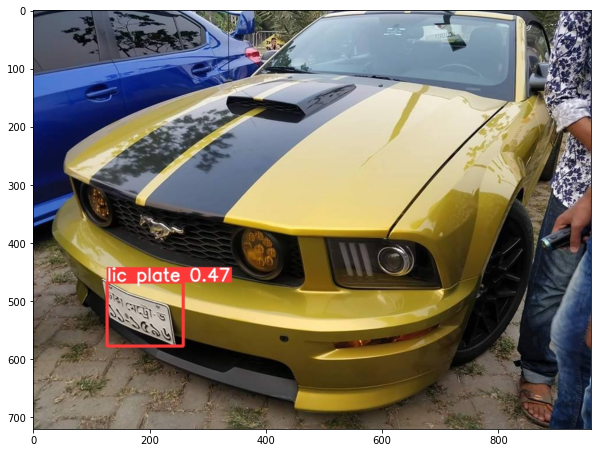

In [26]:
img = cv2.imread('runs/detect/exp/108.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()